In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [55]:
data = pd.read_csv("./input/project/Churn_Modelling.csv")
df = pd.DataFrame(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis (EDA)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [58]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [59]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [60]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

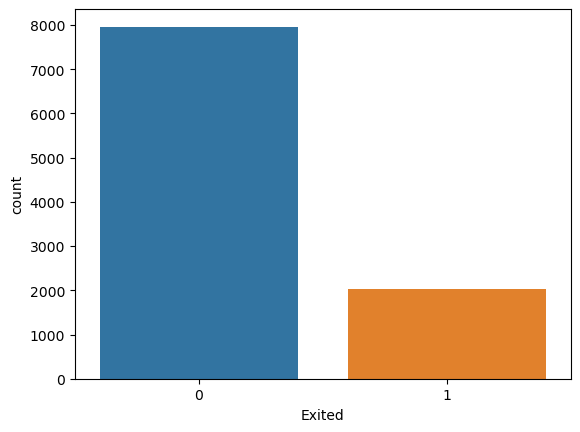

In [61]:
sns.countplot(data=df, x='Exited')

20% of the customers have churned and 80% haven't.

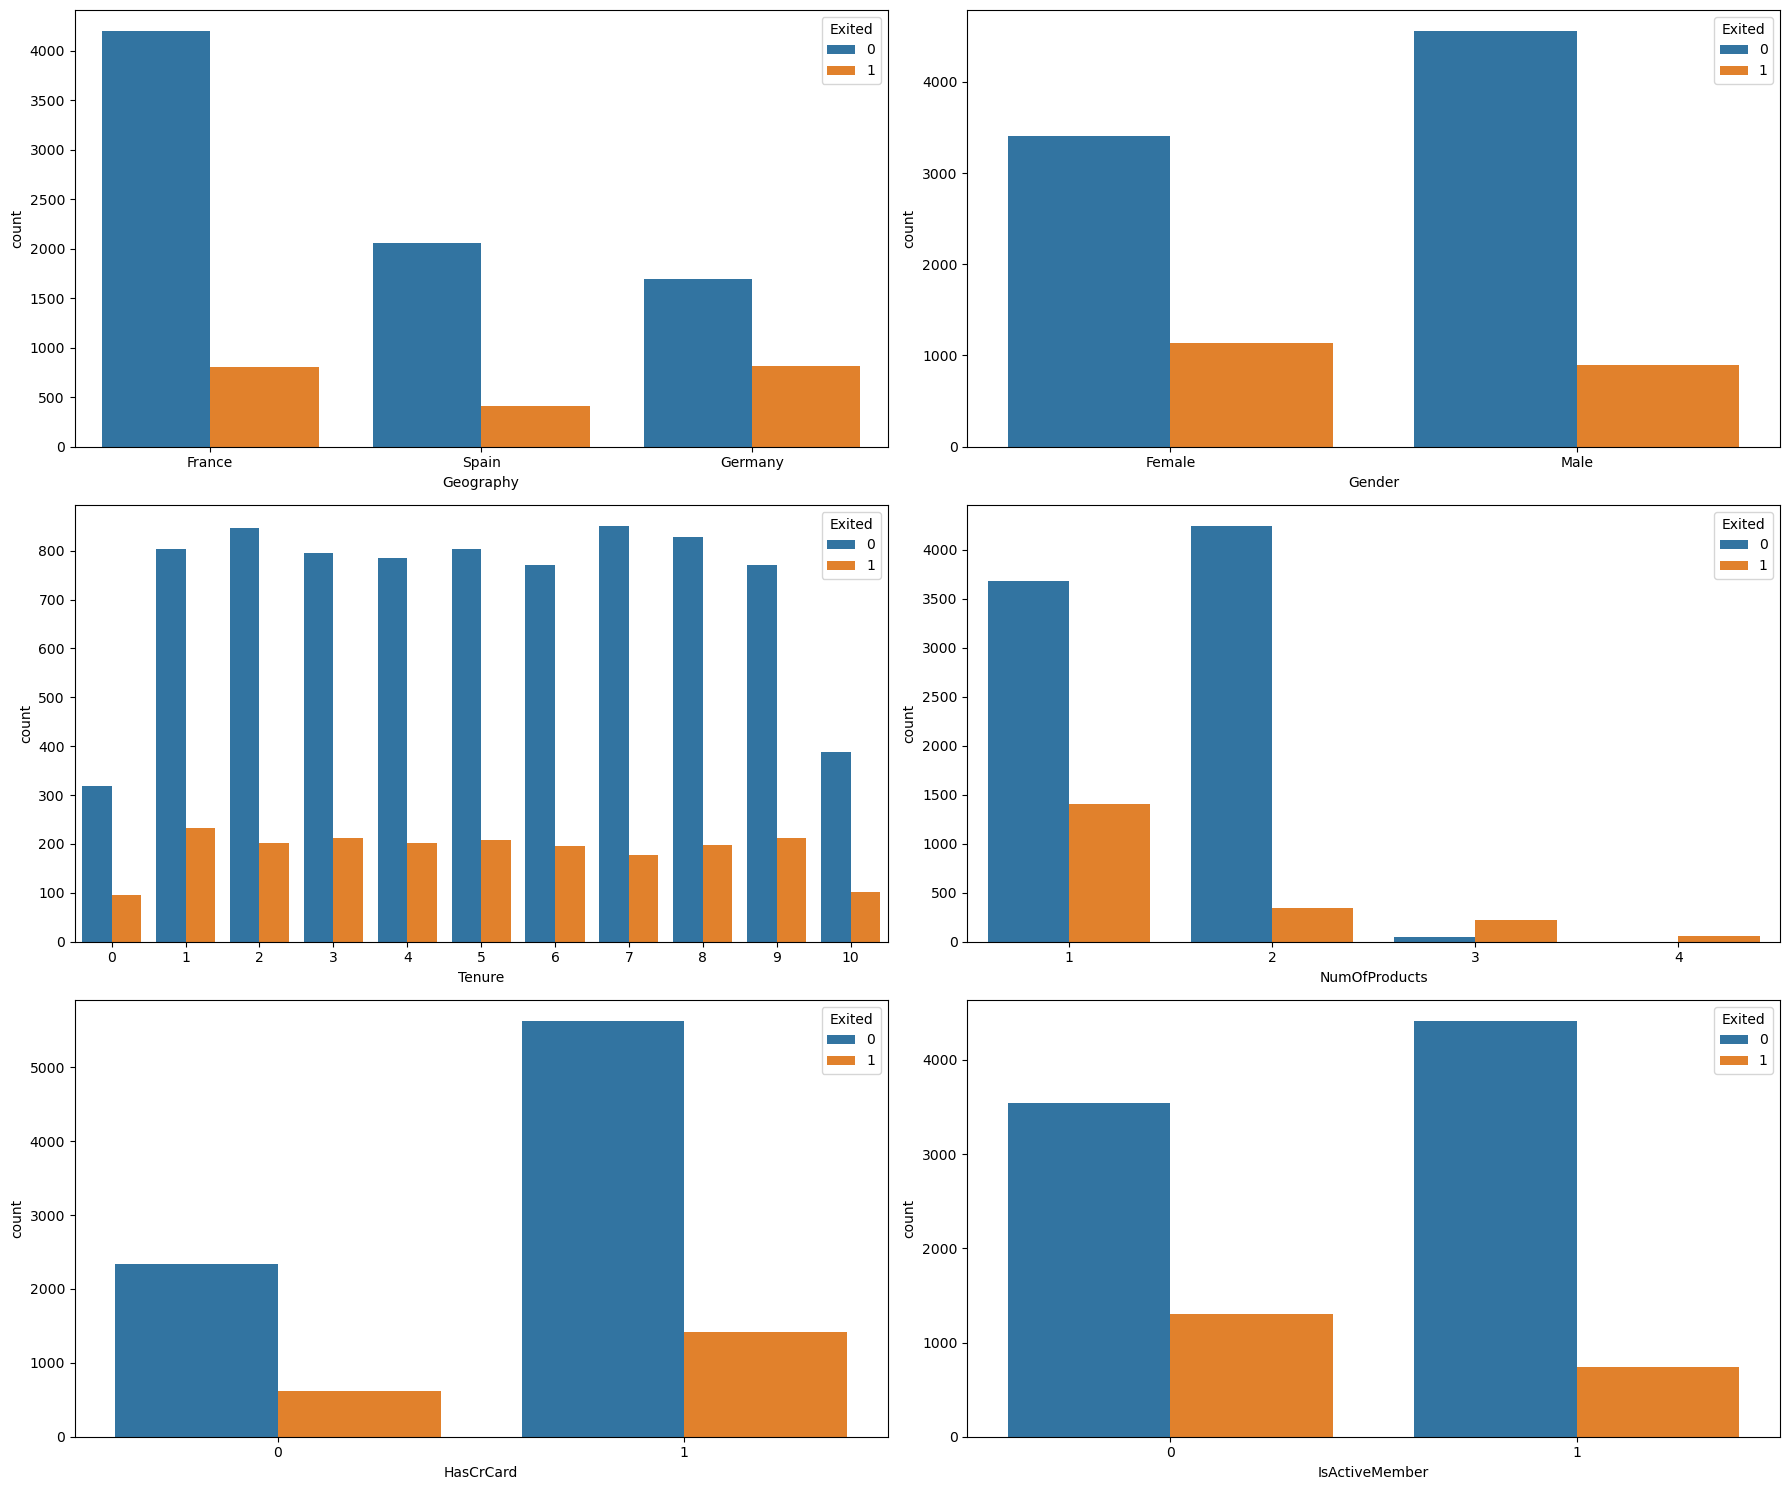

In [62]:
fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot(x='Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot(x='Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot(x='NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

Larger percentage of female customers are churning compared to male customers. \
The largest proportion of customers in the dataset are from France. \
Majority of customers who churned had credit cards. \
Inactive members exhibit a higher churn rate

<Axes: xlabel='Age', ylabel='Count'>

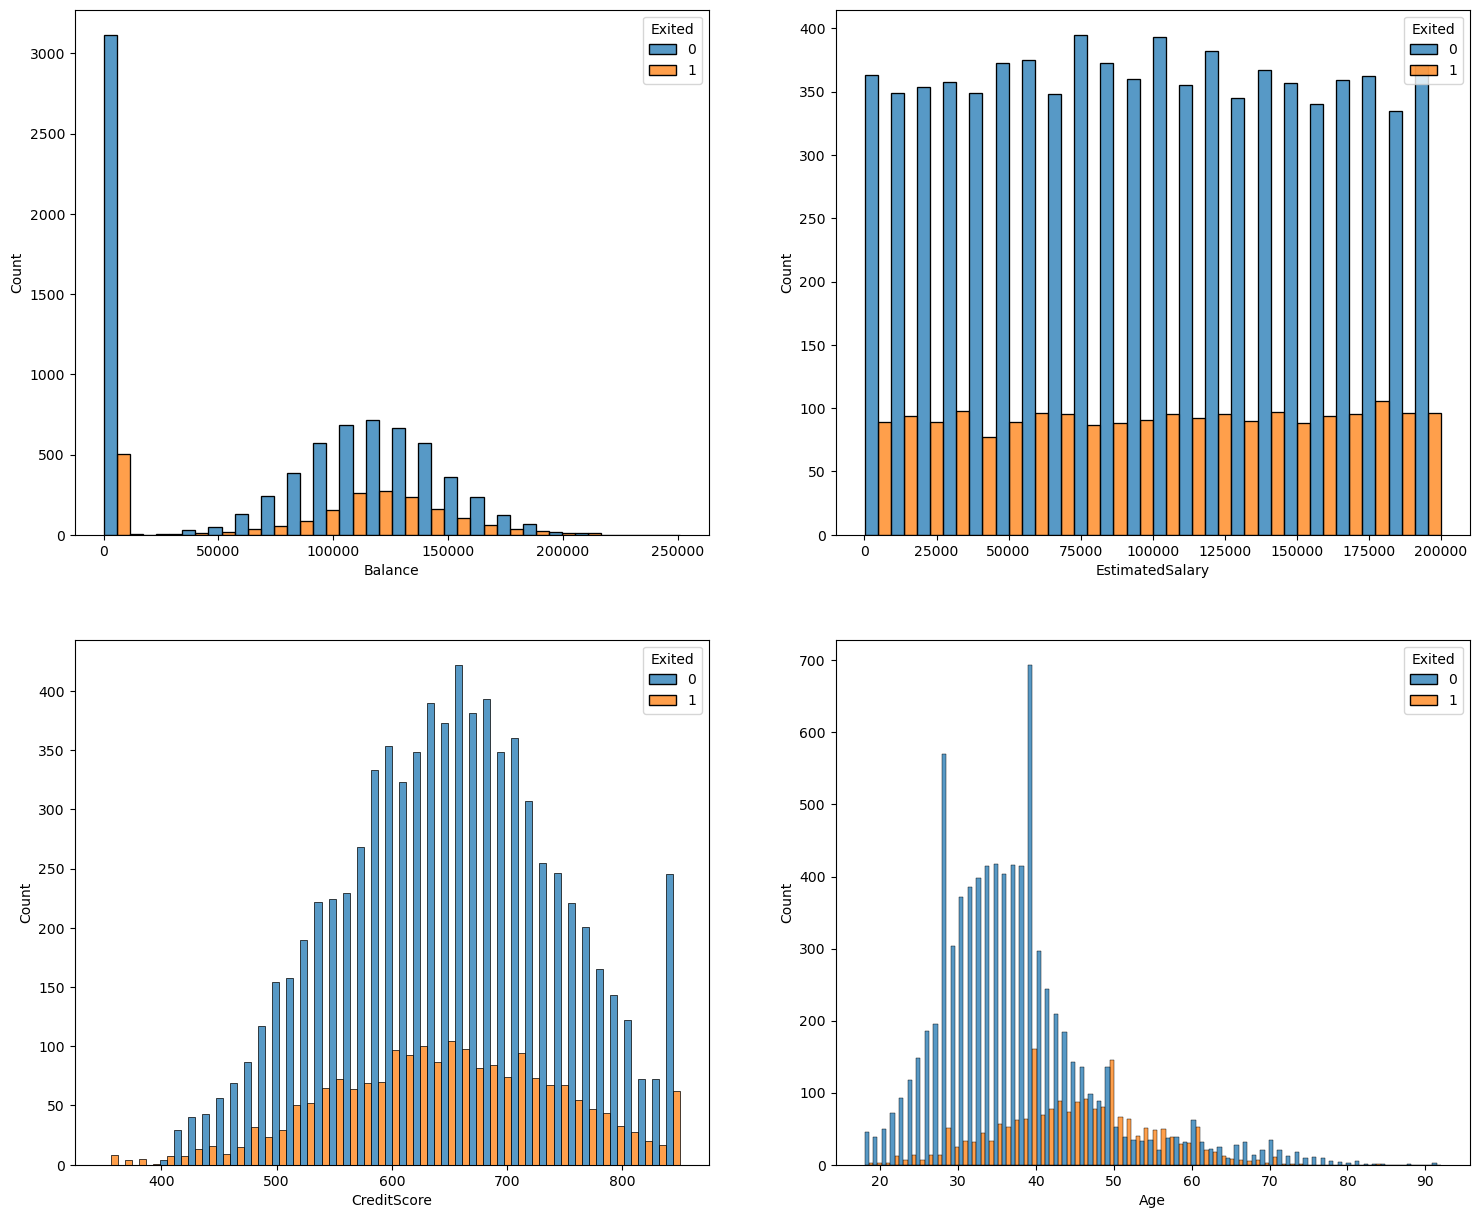

In [63]:
fig , axes = plt.subplots(2, 2, figsize = (18, 15))

sns.histplot(data=df, x='Balance', hue='Exited', ax=axes[0][0], multiple="dodge")
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', ax=axes[0][1], multiple="dodge")
sns.histplot(data=df, x='CreditScore', ax=axes[1][0],  hue='Exited', multiple="dodge")
sns.histplot(data=df, x='Age', ax=axes[1][1], hue='Exited', multiple="dodge")

Customers with zero balances are not churning. \
Churn rates increase among customers after the age of 50. \
Estimated salary of customers does not significantly influence their likelihood to churn

In [65]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [66]:
features = ['Geography', 'Gender']
for f in features:
    df[f] = encoder.fit_transform(df[f])

In [67]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [68]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df['Exited'])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
X_train.shape

(7500, 10)

In [72]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor="val_accuracy", patience=15, mode=max)

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

model.add(Dense(16, activation = 'relu', input_shape = (10, )))
model.add(Dropout(rate = 0.1))

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(rate = 0.1))


model.add(Dense(2, activation = 'softmax'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

history = model.fit(X_train, y_train, validation_split = 0.20, epochs = 100, 
                          callbacks=[es])

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.7287 - accuracy: 0.6012 - val_loss: 0.4953 - val_accuracy: 0.8060
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7898 - val_loss: 0.4469 - val_accuracy: 0.8113
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.7995 - val_loss: 0.4288 - val_accuracy: 0.8127
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8060 - val_loss: 0.4185 - val_accuracy: 0.8247
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8135 - val_loss: 0.4102 - val_accuracy: 0.8273
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8210 - val_loss: 0.4019 - val_accuracy: 0.8367
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8247 - val_loss: 0.3930 - val_accuracy: 0.8460

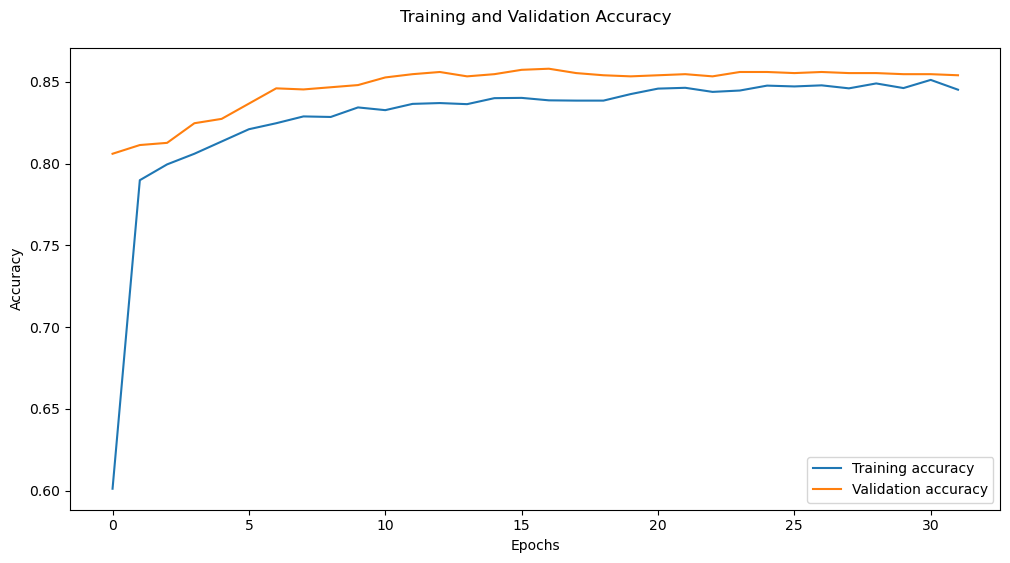

In [75]:
plt.figure(figsize = (12, 6))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 
epoch = range(len(train_accuracy))
plt.plot(epoch, train_accuracy, label = 'Training accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

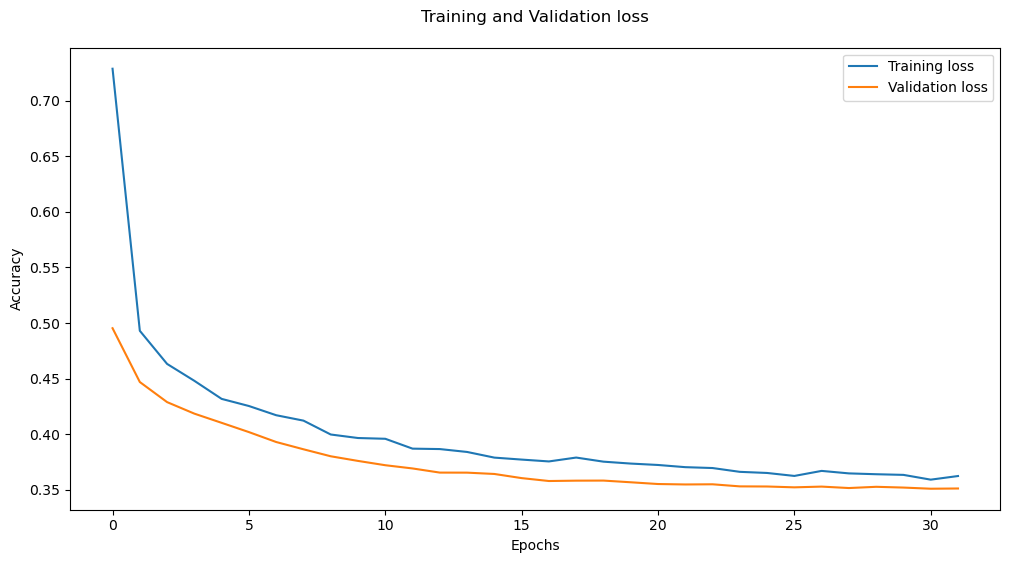

In [76]:
plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(len(train_loss))
plt.plot(epoch, train_loss, label = 'Training loss')
plt.plot(epoch, val_loss, label = 'Validation loss')
plt.title('Training and Validation loss\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Exploring predictions for 5 samples for deeper insights

In [78]:
predictions = model.predict(X_test[:5])

1/1 [==============================] - 0s 83ms/step


In [79]:
predictions[:5]

array([[0.00983324, 0.9901668 ],
       [0.3996012 , 0.6003988 ],
       [0.9110136 , 0.08898641],
       [0.7260137 , 0.27398628],
       [0.94444495, 0.05555507]], dtype=float32)

In [80]:
y_test[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

For X_test[0], model predicted exited(1) with 99.01 % probability. Same for others.

# Balance dataset

In [84]:
df = pd.DataFrame(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [86]:
features = ['Geography', 'Gender']
for f in features:
    df[f] = encoder.fit_transform(df[f])

In [88]:
from sklearn.utils import resample

class_not_exited = df[df['Exited'] == 0]
class_exited = df[df['Exited'] == 1]


In [89]:
n_samples = class_exited.shape[0]
majority_downsampled = resample(class_not_exited, replace=False, n_samples=n_samples, random_state=42)
balanced_data = pd.concat([class_exited, majority_downsampled])

# Shuffle the DataFrame
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [91]:
balanced_data.shape

(4074, 11)

In [92]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

model.add(Dense(16, activation = 'relu', input_shape = (10, )))
model.add(Dropout(rate = 0.1))

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(rate = 0.1))


model.add(Dense(2, activation = 'softmax'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

history = model.fit(X_train, y_train, validation_split = 0.20, epochs = 100, 
                          callbacks=[es])

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5064 - accuracy: 0.7878 - val_loss: 0.4738 - val_accuracy: 0.7933
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7987 - val_loss: 0.4515 - val_accuracy: 0.7947
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8057 - val_loss: 0.4379 - val_accuracy: 0.8000
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8137 - val_loss: 0.4272 - val_accuracy: 0.8067
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8210 - val_loss: 0.4172 - val_accuracy: 0.8100
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8272 - val_loss: 0.4079 - val_accuracy: 0.8240
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8280 - val_loss: 0.4029 - val_accuracy: 0.8313

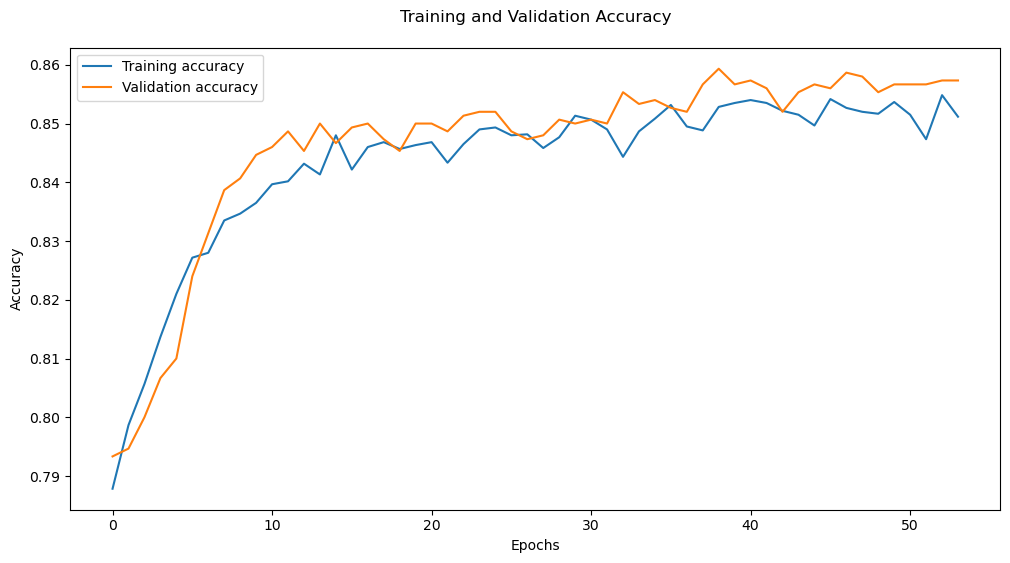

In [96]:
plt.figure(figsize = (12, 6))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 
epoch = range(len(train_accuracy))
plt.plot(epoch, train_accuracy, label = 'Training accuracy')
plt.plot(epoch, val_accuracy, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Balancing the dataset did not yield any benefits. We can use whole dataset. 

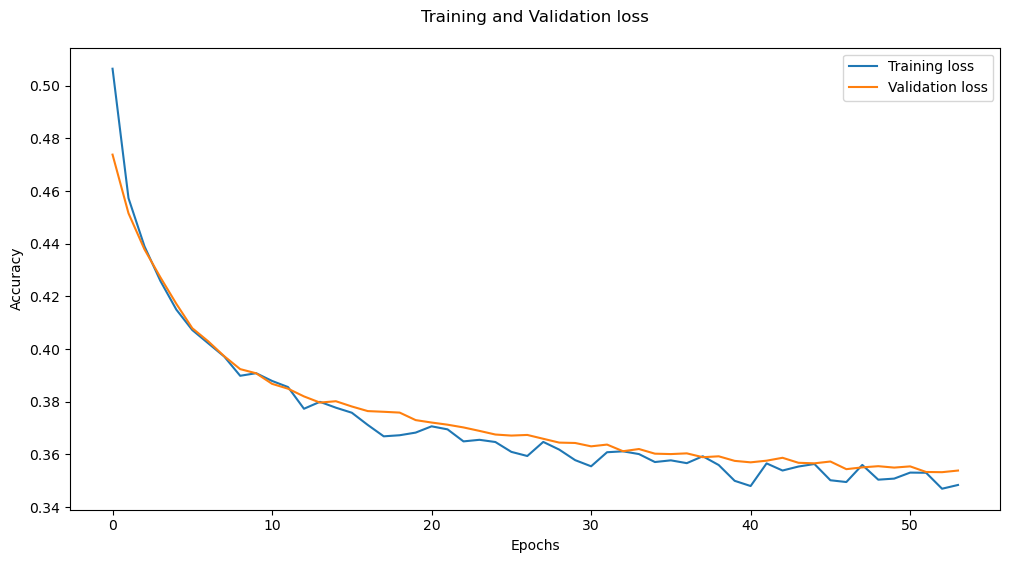

In [98]:
plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(len(train_loss))
plt.plot(epoch, train_loss, label = 'Training loss')
plt.plot(epoch, val_loss, label = 'Validation loss')
plt.title('Training and Validation loss\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tune no of dense layers, units in dense layer , dropout, activation function, 

In [112]:
import keras_tuner
from tensorflow.keras import layers 

def build_model(hp):
    model = keras.Sequential()
    
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units_1", min_value=4, max_value=24, step=4),
            # Tune the activation function to use.
            activation=hp.Choice("activation_1", ["relu", "elu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
        
    model.add(
    layers.Dense(
        # Tune number of units.
        units=hp.Int("units_2", min_value=4, max_value=24, step=4),
        # Tune the activation function to use.
        activation=hp.Choice("activation_2", ["relu", "elu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))

        
    model.add(Dense(2, activation = 'softmax'))    
        
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

In [113]:
build_model(keras_tuner.HyperParameters())

In [114]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [115]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 24, 'step': 4, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 24, 'step': 4, 'sampling': 'linear'}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [116]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[keras.callbacks.TensorBoard("/tmp/tb_logs")])

Trial 10 Complete [00h 01m 10s]
val_accuracy: 0.8037999868392944

Best val_accuracy So Far: 0.8687999844551086
Total elapsed time: 00h 11m 14s


In [118]:
# models = tuner.get_best_models(num_models=2)
# best_model = models[0]
# best_model.summary()

In [119]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
units_1: 16
activation_1: tanh
dropout: False
units_2: 4
activation_2: elu
lr: 0.004881129458495183
Score: 0.8687999844551086

Trial 02 summary
Hyperparameters:
units_1: 12
activation_1: relu
dropout: False
units_2: 24
activation_2: tanh
lr: 0.001382607856108781
Score: 0.8662000000476837

Trial 04 summary
Hyperparameters:
units_1: 12
activation_1: elu
dropout: False
units_2: 12
activation_2: elu
lr: 0.0008478179273261338
Score: 0.8628000020980835

Trial 08 summary
Hyperparameters:
units_1: 12
activation_1: elu
dropout: True
units_2: 16
activation_2: tanh
lr: 0.0022233221296405472
Score: 0.8604000210762024

Trial 05 summary
Hyperparameters:
units_1: 4
activation_1: tanh
dropout: False
units_2: 12
activation_2: elu
lr: 0.0013859880240904726
Score: 0.8560000061988831

Trial 07 summary
Hyperparameters:
units_1: 24
activation_1: relu
dropout:

Maximum validation accuracy achieved for

Hyperparameters:
units_1: 16
activation_1: tanh
dropout: False
units_2: 4
activation_2: elu
lr: 0.0048
Score: 0.8687

In [121]:
%load_ext tensorboard

%tensorboard --logdir /tmp/tb_logs

Reusing TensorBoard on port 6006 (pid 54164), started 1:53:05 ago. (Use '!kill 54164' to kill it.)

In [122]:
# # Define a model-building function
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(tf.keras.Input(shape=(10, )))

#     # Define the hyperparameter for the number of dense layers
#     num_dense_layers = hp.Int('num_dense_layers', min_value=2, max_value=5, step=1)

#     # Add dense layers based on the hyperparameter
#     for i in range(num_dense_layers):
#         units = hp.Int(f'units_{i}', min_value=4, max_value=32, step=4)        
#         activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'elu', 'selu'])
        
#         model.add(keras.layers.Dense(units=units, activation=activation))
        
#         dropout = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1, default=0.2)       
#         model.add(keras.layers.Dropout(dropout))

#     model.add(Dense(2, activation = 'softmax'))   

#     model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

In [123]:
# build_model(keras_tuner.HyperParameters())

In [124]:
# tuner = keras_tuner.RandomSearch(
#     hypermodel=build_model,
#     objective="val_accuracy",
#     max_trials=10,
#     executions_per_trial=2,
#     overwrite=True,
#     directory="/tmp/tb",
# )

In [125]:
# tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), 
#              callbacks=[keras.callbacks.TensorBoard("/tmp/tb_logs")])

In [126]:
# %load_ext tensorboard

# %tensorboard --logdir /tmp/tb_logs

In [127]:
# tuner.results_summary()